In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Checking

In [2]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


Data is the same as the one from Task 1 with a normalized date format

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


However, the data type of DATE column is an object (string). The next step is to transform this column into date type.

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


Month information were extracted from the date for monthly analysis in the next steps. Product number and product name were also dropped because we already have brand attribute.

In [5]:
# Extracting month for monthly analysis
df_prime = df.copy()
df_prime['MONTH'] = df['DATE'].dt.month

# Dropping product number and product name attributes
df_prime.drop(['PROD_NBR', 'PROD_NAME'], axis=1, inplace=True)
df_prime.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10
1,1002,2018-09-16,1,2,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9
2,1003,2019-03-07,1,3,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,3
3,1003,2019-03-08,1,4,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,3
4,1004,2018-11-02,1,5,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11


In [6]:
df_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_QTY          264834 non-null  int64         
 5   TOT_SALES         264834 non-null  float64       
 6   PACK_SIZE         264834 non-null  int64         
 7   BRAND             264834 non-null  object        
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
 10  MONTH             264834 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(3)
memory usage: 21.2+ MB


In [7]:
df_prime.MONTH.unique().size

12

# Control Store Selection

## Trial Stores Performance Quick Look

In [8]:
# Taking trial stores (77, 86, 88) only from the data
trial_stores = df_prime[df_prime['STORE_NBR'].isin([77, 86, 88])]
trial_stores

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
73365,77000,2019-03-28,77,74911,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,3
73366,77000,2019-04-13,77,74912,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,4
73367,77000,2018-09-26,77,74910,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,9
73368,77001,2019-02-27,77,74913,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2
73369,77001,2019-01-21,77,74914,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,1
...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,12
264830,2370751,2018-10-01,88,240394,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,10
264831,2370961,2018-10-24,88,240480,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,10
264832,2370961,2018-10-27,88,240481,2,10.2,300,OLD,OLDER FAMILIES,Budget,10


In [9]:
cols = ['STORE_NBR', 'TOT_SALES', 'MONTH', 'LYLTY_CARD_NBR', 'TXN_ID'] # Returned columns
grps = ['STORE_NBR', 'MONTH'] # Columns to group by

# Trial stores total sales
trial_sum = trial_stores.loc[:, cols].groupby(grps).agg(
    {'TOT_SALES': 'sum',
     'LYLTY_CARD_NBR': 'nunique',
     'TXN_ID': 'nunique'})

# Trial stores number of sales
trial_count = trial_stores.loc[:, cols].groupby(grps).agg(
    {'TOT_SALES': 'count',
     'LYLTY_CARD_NBR': 'nunique',
     'TXN_ID': 'nunique'})

[Text(0.5, 1.0, 'Number of Sales of Trial Stores'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of Sales')]

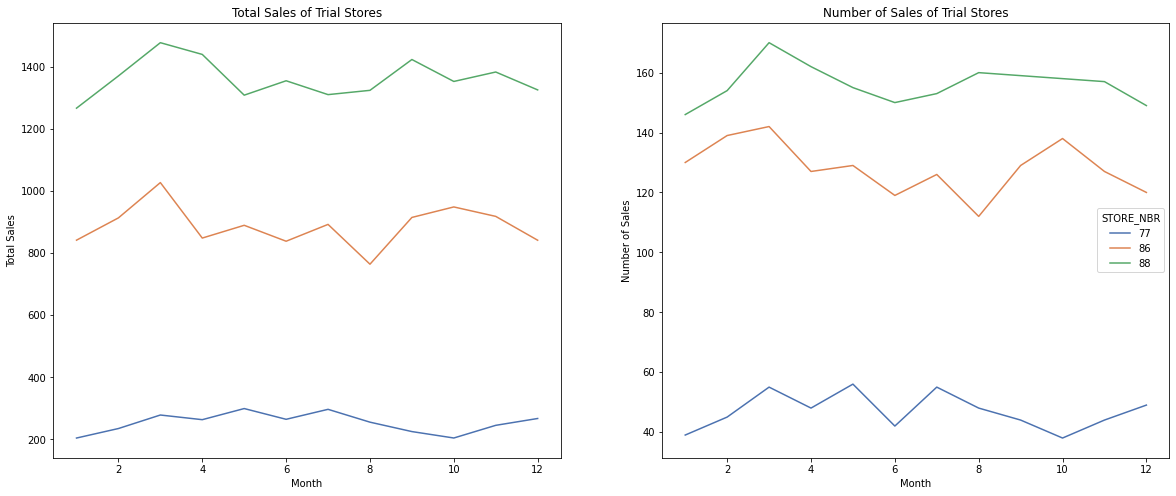

In [10]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(121)
sns.lineplot(x="MONTH", y="TOT_SALES",
             hue="STORE_NBR",
             data=trial_sum,
             legend=False,
             palette = 'deep').set(title='Total Sales of Trial Stores',
                 xlabel ="Month", ylabel = "Total Sales")

ax2 = fig.add_subplot(122)
sns.lineplot(x="MONTH", y="TOT_SALES",
             hue="STORE_NBR",
             data=trial_count,
             palette = 'deep').set(title='Number of Sales of Trial Stores',
                 xlabel ="Month", ylabel = "Number of Sales")

- Store 88 is the best performing trial store
- All trial stores have similar total sales and number of sales trend
- The gap between store 86 and 88 is closer in number of sales, it might be caused by more quantity/higher price products were sold at store 88

## Analysis by Store

In [11]:
# Grouping sales by store number
cols = ['STORE_NBR', 'TOT_SALES', 'MONTH', 'LYLTY_CARD_NBR', 'TXN_ID'] # Returned columns
grps = ['STORE_NBR'] # Columns to group by

tempdf = df_prime.loc[:, cols].groupby(grps).agg(
    {'TOT_SALES': 'sum', 
     'MONTH': 'nunique',
     'LYLTY_CARD_NBR': 'nunique',
     'TXN_ID': 'nunique'})
tempdf.sort_values('TOT_SALES', ascending=0)

,TOT_SALES,MONTH,LYLTY_CARD_NBR,TXN_ID
STORE_NBR,,,,
226,17605.45,12,381,2008
88,16333.25,12,388,1857
165,15973.75,12,390,1806
40,15559.50,12,388,1756
237,15539.50,12,382,1773
...,...,...,...,...
206,7.60,2,2,2
252,7.40,2,2,2
11,6.70,2,2,2


In [12]:
tempdf.sort_values('LYLTY_CARD_NBR', ascending=0).drop(['MONTH', 'TOT_SALES'], axis=1)

,LYLTY_CARD_NBR,TXN_ID
STORE_NBR,,
203,397,1650
123,394,1542
58,393,1727
165,390,1806
88,388,1857
...,...,...
206,2,2
211,2,2
252,2,2


In [13]:
tempdf.sort_values('TXN_ID', ascending=0).drop(['MONTH', 'TOT_SALES'], axis=1)

,LYLTY_CARD_NBR,TXN_ID
STORE_NBR,,
226,381,2008
88,388,1857
93,264,1818
165,390,1806
237,382,1773
...,...,...
211,2,2
206,2,2
11,2,2


- Store 226 is the top performing store by total sales (17605.45)
- Store 203 has the most customer recorded (397)
- Store 226 is also the one with the most transactions (2008)
- Some stores have very low records of month, card number, and transaction. This might be recently recorded stores and they will be removed

In [14]:
# Removing stores with less than 12 months of recroded data and slicing data from Feb 2019 - Apr 2019

del_store = tempdf[tempdf['MONTH'] < 12].index.to_list() # Find sotres with < 12 months data 
print('Stores to remove = ', del_store)

fstore = df_prime[-df_prime['STORE_NBR'].isin(del_store)] # Define filtered table, taking only stores not in del_store list
fstore

Stores to remove =  [11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10
1,1002,2018-09-16,1,2,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9
2,1003,2019-03-07,1,3,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,3
3,1003,2019-03-08,1,4,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,3
4,1004,2018-11-02,1,5,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11
...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,12
264830,2370751,2018-10-01,88,240394,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,10
264831,2370961,2018-10-24,88,240480,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,10
264832,2370961,2018-10-27,88,240481,2,10.2,300,OLD,OLDER FAMILIES,Budget,10


## Analysing Control Store Metrics

The metrics to consider for control stores selection are:
- total sales revenue
- total number of customers
- average number of transactions per customer

In [15]:
# Grouping sales by store number and month
cols = ['STORE_NBR', 'TOT_SALES', 'MONTH', 'LYLTY_CARD_NBR', 'TXN_ID'] # Returned columns
grps = ['STORE_NBR', 'MONTH'] # Columns to group by

# Aggregation for monthly total sales revenue and monthly total number of customers
tempdf2 = fstore.loc[:, cols].groupby(grps).agg(
    TOT_SALES=('TOT_SALES', 'sum'), 
    CUST_NUM=('LYLTY_CARD_NBR', 'nunique'),
    TXN_NUM=('TXN_ID', 'nunique'))
tempdf2

TOT_SALES  CUST_NUM  TXN_NUM
STORE_NBR MONTH                              
1         1         154.80        35       36
          2         225.40        52       55
          3         192.90        45       49
          4         192.90        42       43
          5         221.40        46       51
...                    ...       ...      ...
272       8         372.85        44       48
          9         304.70        32       36
          10        430.60        44       50
          11        376.20        41       45
          12        403.90        47       47

[3120 rows x 3 columns]

In [16]:
# Deriving the 3rd metric, average number of transactions per customer
tempdf2['AVG_CUST_TXN'] = tempdf2['TXN_NUM']/tempdf2['CUST_NUM']
tempdf2.head(12)

TOT_SALES  CUST_NUM  TXN_NUM  AVG_CUST_TXN
STORE_NBR MONTH                                            
1         1          154.8        35       36      1.028571
          2          225.4        52       55      1.057692
          3          192.9        45       49      1.088889
          4          192.9        42       43      1.023810
          5          221.4        46       51      1.108696
          6          174.1        42       42      1.000000
          7          206.9        49       52      1.061224
          8          176.1        42       43      1.023810
          9          278.8        59       62      1.050847
          10         188.1        44       45      1.022727
          11         192.6        46       47      1.021739
          12         189.6        42       47      1.119048

In [17]:
tempdf2.describe()

,TOT_SALES,CUST_NUM,TXN_NUM,AVG_CUST_TXN
count,3120.000000,3120.000000,3120.000000,3120.000000
mean,619.267340,70.862179,84.275000,1.143527
std,385.616347,36.155974,47.245174,0.110784
min,1.500000,1.000000,1.000000,1.000000
25%,269.300000,42.000000,44.000000,1.043478
50%,700.600000,82.000000,99.500000,1.130435
75%,930.850000,103.000000,127.000000,1.234694
max,1659.600000,150.000000,188.000000,1.468085


In [18]:
# Droping customer number for simpler table (contains only 3 defined metrics)
metrics_df = tempdf2.drop('TXN_NUM', axis=1)
metrics_df

TOT_SALES  CUST_NUM  AVG_CUST_TXN
STORE_NBR MONTH                                   
1         1         154.80        35      1.028571
          2         225.40        52      1.057692
          3         192.90        45      1.088889
          4         192.90        42      1.023810
          5         221.40        46      1.108696
...                    ...       ...           ...
272       8         372.85        44      1.090909
          9         304.70        32      1.125000
          10        430.60        44      1.136364
          11        376.20        41      1.097561
          12        403.90        47      1.000000

[3120 rows x 3 columns]

*i have calculated the correlation of each store with all trial stores and the gap between average transaction per customer and other metrics are too sparse, in this function the correlation of all metrics will be weighted averaged by the following weights:
- Total sales revenue: 50%, 
- Total number of customer: 45% 
- Average transactions/customer: 5%

In [19]:
store_list = metrics_df.index.get_level_values('STORE_NBR').unique().to_list() # Return stores as a list

def correlate(store_nbr):
    x = [] # Initiate empty list 
    for i in store_list:
        x.append(metrics_df.loc[store_nbr].corrwith(metrics_df.loc[i])) # Correlate input store with each store and keep them in the list
    corr_df = pd.DataFrame(x) # Turn list into pandas dataframe
    corr_df.index = metrics_df.index.get_level_values('STORE_NBR').unique() # Put store numbers as index
    corr_df = corr_df.abs() # Make all values absolute

    weights = [0.50, 0.45, 0.05] # Define weight for averaging
    corr_df['AVG_CORR'] = (corr_df * weights).sum(axis=1) / np.sum(weights) # Get weighted average value from all correlations
    corr_df.sort_values('AVG_CORR', ascending=0, inplace=True) # Sort by mean correlation
    return corr_df.drop(store_nbr).dropna() # Drop correaltion with the same store and drop null values caused by 0 deviation

In [20]:
corr77 = correlate(77)
corr86 = correlate(86)
corr88 = correlate(88)

<Axes: title={'center': 'Store 88 Correlations'}, xlabel='Store', ylabel='Correlation'>

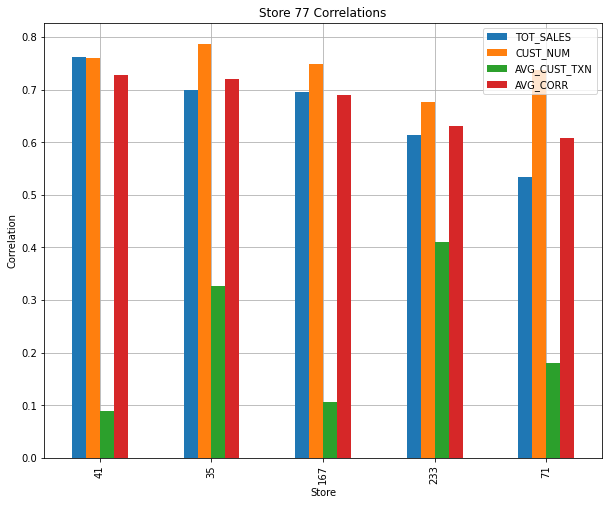

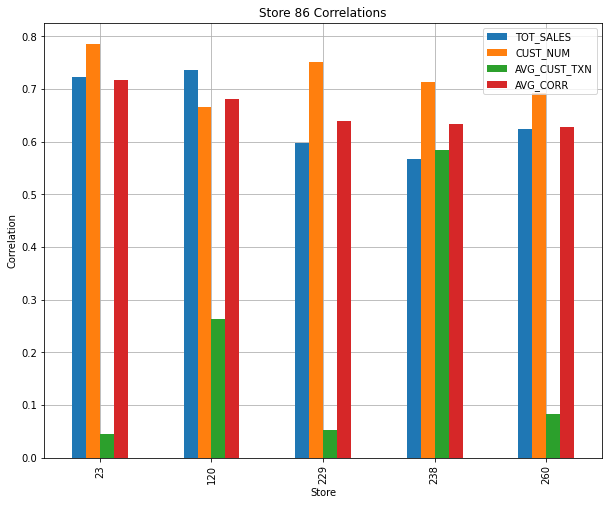

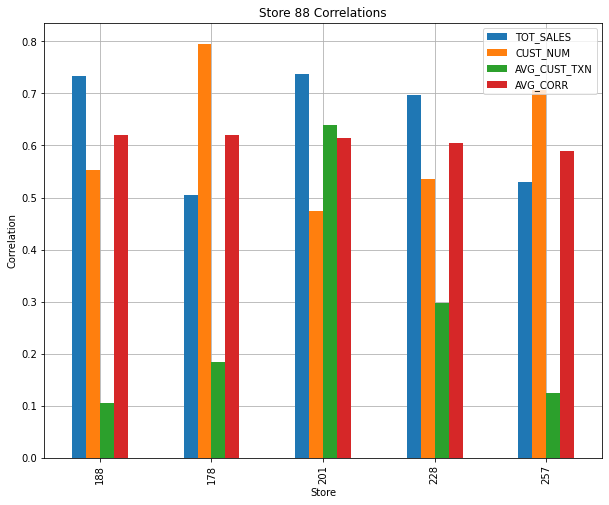

In [21]:
corr77.head().plot(kind='bar',  
                   title = 'Store 77 Correlations',
                   xlabel = 'Store',
                   ylabel = 'Correlation',
                   figsize = (10,8),
                   grid = 1,
                   zorder = 4,
                   )

corr86.head().plot(kind='bar',  
                   title = 'Store 86 Correlations',
                   xlabel = 'Store',
                   ylabel = 'Correlation',
                   figsize = (10,8),
                   grid = 1,
                   zorder = 4,
                   )

corr88.head().plot(kind='bar',  
                   title = 'Store 88 Correlations',
                   xlabel = 'Store',
                   ylabel = 'Correlation',
                   figsize = (10,8),
                   grid = 1,
                   zorder = 4,
                   )

Qualitatively, store 201 looks promising as a control store because the gap between correlations are not too far. Store 201 will be selected for control store because the weighted average value is not notably different than 188.

The following trial-control store pairs will be used for further analysis:
- Store 77 : Store 41
- Store 86 : Store 23
- Store 88 : Store 201

In [22]:
# def mag_dist(store_nbr):
#     x = []
#     for i in store_list:
#         observed_distance = (metrics_df.loc[store_nbr] - metrics_df.loc[i]).abs()
#         magnitude_distance = 1 - (observed_distance - metrics_df.min()) / (metrics_df.max() - metrics_df.min())
#         x.append(magnitude_distance.mean())
#     md_df = pd.DataFrame(x) 
#     md_df.index = metrics_df.index.get_level_values('STORE_NBR').unique() 
#     md_df = md_df.abs() 
#     md_df['AVG_MD'] = md_df.mean(axis=1) 
#     md_df.sort_values('AVG_MD', ascending=0, inplace=True) 
#     return md_df

In [24]:
# Slice table within the trial period
f_df = metrics_df.loc[(metrics_df.index.get_level_values('MONTH') >= 2 ) & (metrics_df.index.get_level_values('MONTH') <= 4 )]

# Return only stores from trial-control pairs
final_store = [77, 41, 86, 23, 88, 201]
f_df = f_df.loc[(f_df.index.get_level_values('STORE_NBR').isin(final_store))]

f_df

TOT_SALES  CUST_NUM  AVG_CUST_TXN
STORE_NBR MONTH                                   
23        2          867.8       100      1.250000
          3          767.6        86      1.209302
          4          912.0        96      1.322917
41        2          234.6        50      1.000000
          3          226.2        46      1.065217
          4          231.3        47      1.042553
77        2          235.0        45      1.000000
          3          278.5        50      1.100000
          4          263.5        47      1.021277
86        2          913.2       107      1.289720
          3         1026.8       115      1.217391
          4          848.2       105      1.200000
88        2         1370.2       124      1.233871
          3         1477.2       134      1.261194
          4         1439.4       128      1.265625
201       2         1139.2       111      1.153153
          3         1364.2       130      1.169231
          4         1246.6       122      1.196721

The final table for trial analysis is sliced table that contain only trial and control stores within the trial period (2nd – 4th month).
This table will be used for further analysis.

# Assessment of the Trial

In [ ]:
# Slicing table for each pair
f_df_res = f_df.reset_index()

pair1 = f_df_res[(f_df_res['STORE_NBR'] == 77) | (f_df_res['STORE_NBR'] == 41)]
pair2 = f_df_res[(f_df_res['STORE_NBR'] == 86) | (f_df_res['STORE_NBR'] == 23)]
pair3 = f_df_res[(f_df_res['STORE_NBR'] == 88) | (f_df_res['STORE_NBR'] == 201)]


[Text(0.5, 0, ''), Text(0, 0.5, '')]

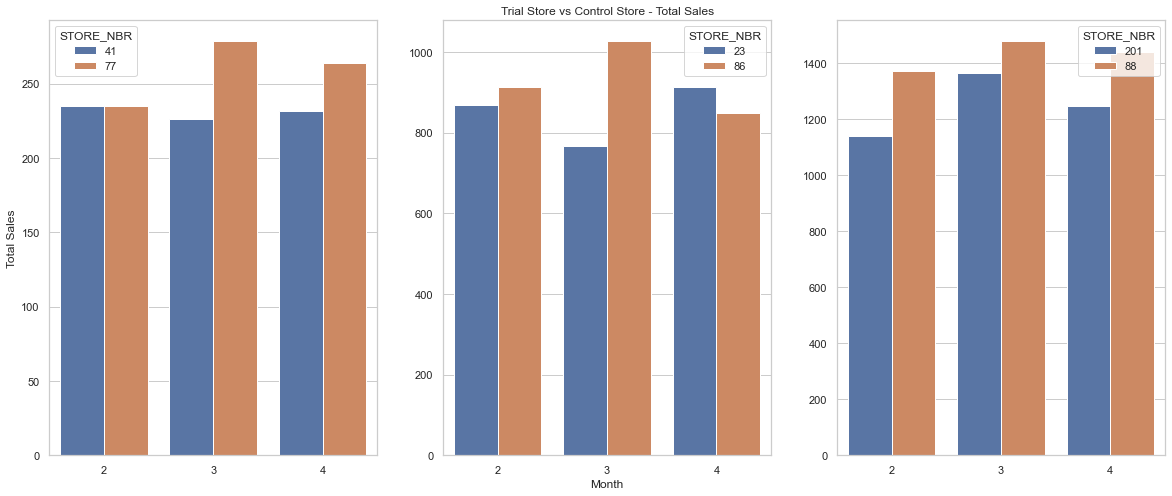

In [ ]:
fig2 = plt.figure(figsize=(20, 8))

ax1 = fig2.add_subplot(131)
sns.barplot(data=pair1, x='MONTH', y='TOT_SALES', hue='STORE_NBR').set(
    xlabel='', ylabel='Total Sales')

ax2 = fig2.add_subplot(132)
sns.barplot(data=pair2, x='MONTH', y='TOT_SALES', hue='STORE_NBR').set(
    title='Trial Store vs Control Store - Total Sales', xlabel='Month', ylabel='')

ax3 = fig2.add_subplot(133)
sns.barplot(data=pair3, x='MONTH', y='TOT_SALES', hue='STORE_NBR',
            hue_order=[201, 88]).set(xlabel='', ylabel='')

Overall, trial stores are doing better on total sales revenue. Some notes to be taken are:
- The total sales of store 41 and store 77 on Feb 2019 is highly similar
- The only period where control store is doing better is store 23 against store 86 on Apr 2019

[Text(0.5, 0, ''), Text(0, 0.5, '')]

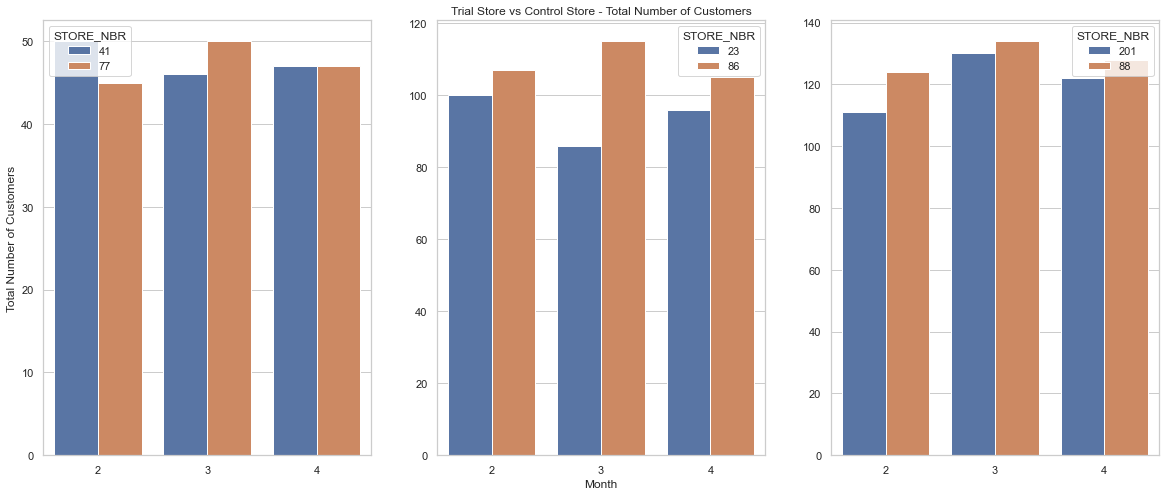

In [ ]:
fig3 = plt.figure(figsize=(20, 8))

ax1 = fig3.add_subplot(131)
sns.barplot(data=pair1, x='MONTH', y='CUST_NUM', hue='STORE_NBR').set(
    xlabel='', ylabel='Total Number of Customers')

ax2 = fig3.add_subplot(132)
sns.barplot(data=pair2, x='MONTH', y='CUST_NUM', hue='STORE_NBR').set(
    title='Trial Store vs Control Store - Total Number of Customers', xlabel='Month', ylabel='')

ax3 = fig3.add_subplot(133)
sns.barplot(data=pair3, x='MONTH', y='CUST_NUM', hue='STORE_NBR',
            hue_order=[201, 88]).set(xlabel='', ylabel='')

Just like total sales revenue, in general trial stores are doing better on total number of customers too. Some notes to be taken are:
- The number of customers of store 41 and store 77 on Apr 2019 is highly similar
- The only period where control store is doing better is store 41 against store 77 on Feb 2019

[Text(0.5, 0, ''), Text(0, 0.5, '')]

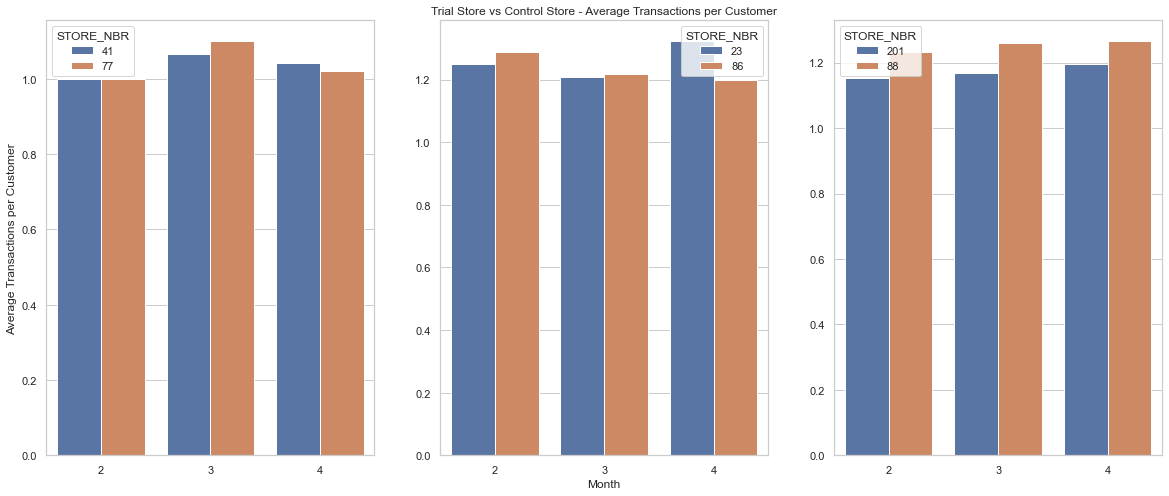

In [ ]:
fig4 = plt.figure(figsize=(20, 8))

ax1 = fig4.add_subplot(131)
sns.barplot(data=pair1, x='MONTH', y='AVG_CUST_TXN', hue='STORE_NBR').set(
    xlabel='', ylabel='Average Transactions per Customer')

ax2 = fig4.add_subplot(132)
sns.barplot(data=pair2, x='MONTH', y='AVG_CUST_TXN', hue='STORE_NBR').set(
    title='Trial Store vs Control Store - Average Transactions per Customer', xlabel='Month', ylabel='')

ax3 = fig4.add_subplot(133)
sns.barplot(data=pair3, x='MONTH', y='AVG_CUST_TXN', hue='STORE_NBR',
            hue_order=[201, 88]).set(xlabel='', ylabel='')

We can derive slightly different insights from comparing each store based on the last metric
- Varying performance are present, but trial stores still win the majority of this comparison
- Highly similar magnitudes are found in Feb 2019 (41 vs 77) and Mar 2019 (23 vs 86)
- In Apr 2019 control store 41 did slightly better than trial store 77
- In Apr 2019 control store 23 did significantly better than trial store 86

To be confident with these take, we need to conduct statistical analysis to tell whether our findings are likely to be coincidence or not.

### Hypothesis Test

Null hypothesis: The performance of every metric of each trial-control store are actually the same.<br/>
Since the trial period only gives relatively tiny sample of the dataset, we will use 10% threshold to reject our hypothesis (p-value < 0.1)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def p_val(trial, control):
    p_metrics = ['TOT_SALES', 'CUST_NUM', 'AVG_CUST_TXN']
    x=[]

    for i in f_df[p_metrics]:
        x.append(ttest_ind(f_df.loc[trial][i], f_df.loc[control][i]).pvalue)
    x = pd.DataFrame(x, index=p_metrics)
    return x.rename(columns={0: 'p-value'})

In [ ]:
print('The p-value of Store 77 vs Store 41 for each metric is:\n', p_val(77, 41), '\n\n')
print('The p-value of Store 86 vs Store 23 for each metric is:\n', p_val(86, 23), '\n\n')
print('The p-value of Store 88 vs Store 201 for each metric is:\n', p_val(88, 201), '\n\n')

The p-value of Store 77 vs Store 41 for each metric is:
                p-value
TOT_SALES     0.094879
CUST_NUM      0.868274
AVG_CUST_TXN  0.906312 


The p-value of Store 86 vs Store 23 for each metric is:
                p-value
TOT_SALES     0.299795
CUST_NUM      0.043909
AVG_CUST_TXN  0.592624 


The p-value of Store 88 vs Store 201 for each metric is:
                p-value
TOT_SALES     0.068166
CUST_NUM      0.285701
AVG_CUST_TXN  0.007541 




Turns out not every metric pass the threshold to reject the null hypothesis, those are:
- Total number of customers from 77-41 pair with a score of 0.87, not significant
- Average transactions per customer from 77-41 pair with a score of 0.91, not significant
- Total sales revenue from 86-23 pair with a score of 0.30, not significant
- Average transactions per customer from 86-23 pair with a score of 0.60, not significant
- Total number of customers from 88-201 pair with a score of 0.28, not significant

The rest are less than 10% so we can say they perform differently.

# Collate Findings

- Correlations between trial stores and the rest of stores are not too high with the maximum weighted average correlation only scored about 0.7
- Trial on store 77 didn’t gave any significant difference on total number of customers and average transactions per customer. However total sales were increased after the 1st trial month
- Trial on store 86 didn’t gave any significant difference on average transactions per customer and total sales, even though it made more sales on the 1st and 2nd month of trial compared to its control store
- We can see increases in the number of customers each month on store 88 but based on p-value calculation it’s not significant. The rest of the metrices however, performed differently and surpassed its control store based on graph and hypothesis test.

Based on prior points, the trial conducted might be flawed (either its planning, practice, or both) as it resulted in inconsistent difference on defined metrices. But if we are about to sum up our findings based on total sales only, store 77 and store 88 indeed had better sales during the trial period.

Our recommendation would be to find/create a better control store before conducting another trial with better similarity and monitor both control and trial store during the trial period to ensure intended changes are well implemented.